In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from grid import Grid, Converter, regular_grid

In [2]:
##an image of global earth land and ocean features
##downloaded form www.naturalearthdata.com/download/50m/raster/NE1_50M_SR_W.zip
ds = 5 ##down sample to reduce memory load here
im = plt.imread('/scratch/NE1_50M_SR_W.tif')[::ds, ::ds, :]

In [3]:
##the coordinates for im
dx = 360./10800*ds
dy = 180./5400*ds
x, y = np.meshgrid(np.arange(-179.99, 180, dx), np.arange(90, -90, -dy))
proj = pyproj.Proj('+proj=longlat')
grid = Grid(proj, x, y, cyclic_dim='x', pole_dim='y', pole_index=(0, -1))

choose target map projection and make a regular grid

find a list of available projections: https://proj.org/en/9.2/operations/projections/index.html

In [4]:
##1. polar stereographic
proj1 = pyproj.Proj("+proj=stere +lat_0=90 +lon_0=0")
x1, y1 = regular_grid(-3e6, 3e6, -3e6, 3e6, dx=3e3)
grid1 = Grid(proj1, x1, y1, cache_land=True)
figsize = (8,8)

In [ ]:
##2. mercator
proj1 = pyproj.Proj("+proj=merc")
x1, y1 = regular_grid(-2e7, 2e7, -5e6, 1.2e7, dx=1e4)
grid1 = Grid(proj1, x1, y1, cache_land=True)
figsize = (10,5)

In [ ]:
##3. lambert conic conformal
proj1 = pyproj.Proj("+proj=lcc +lon_0=-30 +lat_1=40 +lat_2=60")
x1, y1 = regular_grid(-3e6, 3e6, 1e6, 11e6, dx=3e3)
grid1 = Grid(proj1, x1, y1, cache_land=True)
figsize = (8,10)

In [5]:
##convert im to new proj, see grid_convert.ipynb for more details
conv = Converter(grid, grid1)

In [6]:
im1 = np.full(grid1.x.shape+(3,), 0, dtype=np.int16)
for i in range(3):
    im1[...,i] = conv.convert(im[...,i])

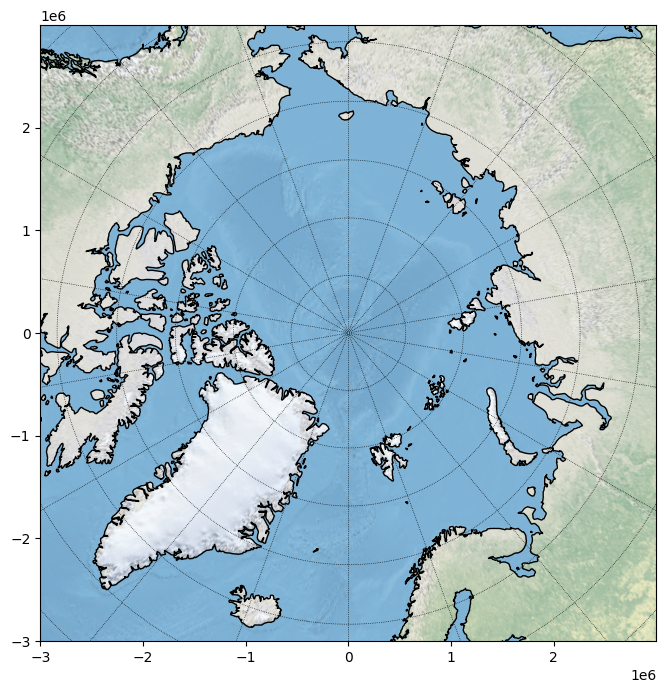

In [7]:
##draw the earth image in proj1
fig, ax = plt.subplots(1, 1, figsize=figsize)

##note: imshow has y direction reversed
##use extent=[] to set the right coordinates for imshow
ax.imshow(im1[::-1, :, :], extent=[np.min(grid1.x), np.max(grid1.x), np.min(grid1.y), np.max(grid1.y)])
grid1.plot_land(ax)
